The distribution of a dataset can be approximated using probability density functions (pdfs). Here we use 


*   Gaussian
*   Uniform
*   Exponential




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


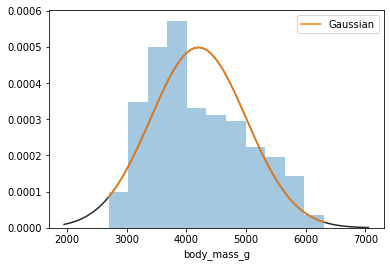

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

penguins = sns.load_dataset("penguins")
norm = stats.norm
mean, std = np.mean(penguins["body_mass_g"]), np.std(penguins["body_mass_g"])

sns.distplot(penguins["body_mass_g"], fit=norm, kde=False)
x = np.linspace(penguins["body_mass_g"].min(), penguins["body_mass_g"].max(), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, label="Gaussian")
plt.legend()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


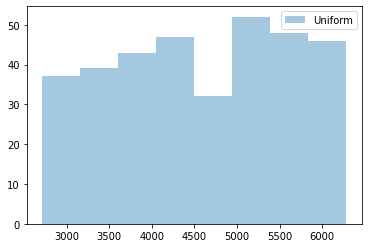

In [2]:
uniform = np.random.uniform(penguins["body_mass_g"].min(), penguins["body_mass_g"].max(), len(penguins["body_mass_g"]))

sns.distplot(uniform, kde=False, label="Uniform")
plt.legend()
plt.show()


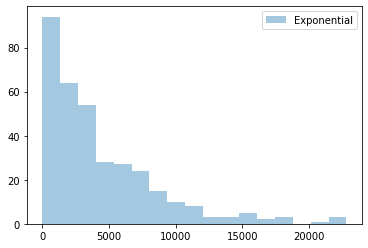

In [3]:
expon = np.random.exponential(scale=mean, size=len(penguins["body_mass_g"]))

sns.distplot(expon, kde=False, label="Exponential")
plt.legend()
plt.show()


Through the Central Limit Theorem, and with enough sample size, it has been shown that it approaches the normal distribution.

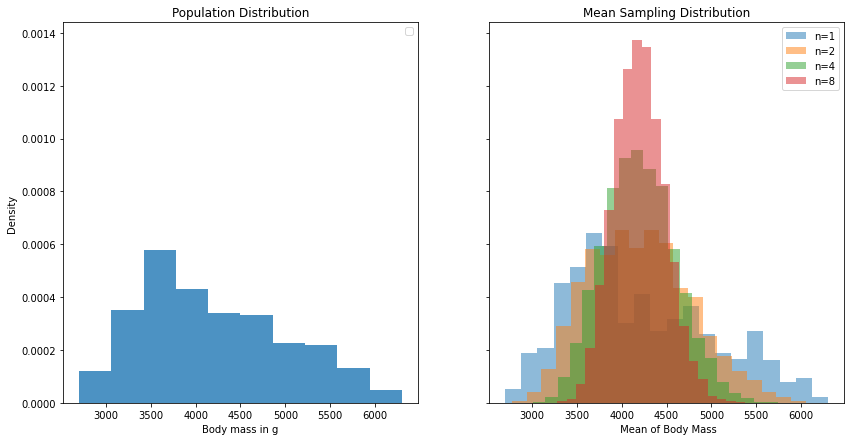

In [4]:
fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)

ax[0].hist(penguins["body_mass_g"], density=True, alpha=0.8 )
ax[0].set(title='Population Distribution', xlabel='Body mass in g', ylabel='Density', label = f'N = {len(penguins["body_mass_g"])}')
ax[0].legend()

for n in [1,2,4,8]:
    
    np.random.seed(420)
    sample_means = []
    
    for i in range(10000):
        samp = np.random.choice(penguins["body_mass_g"].values, n)
        sample_means.append(np.mean(samp))
        
    ax[1].hist(sample_means, label=f"n={n}", bins=20,
               #histtype='step', 
               alpha=0.5,
               density=True);

ax[1].set(title='Mean Sampling Distribution', xlabel=' Mean of Body Mass')
ax[1].legend()

Or we could define a function that shows CLT in action for any 1D numpy array

In [5]:
def CLT_Demonstrator(pop_dist, sample_list, dist_title=None):
    """
    A crude function for visualizing CLT from a given distribution array an a list of sample numbers to consider.
    
    Parameters:
    
    pop_dist: The 1D array containing the distribution.
    sample_list: The list of integers to be considered as sample sizes.
    dist_title: The name of the distribution visualized.
    """
    pop_size = len(pop_dist)

    fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)
    fig.suptitle(dist_title, fontsize=25)

    ax[0].hist(pop_dist, density=True, bins=50, alpha=0.8, label=f"N={pop_size}")
    ax[0].set(title='Population Distribution', xlabel="x")
    ax[0].legend()

    for n in sample_list:

        np.random.seed(420)
        sample_means = []

        for i in range(10000):
            samp = np.random.choice(pop_dist, n)
            sample_means.append(np.mean(samp))

        ax[1].hist(sample_means, label=f"n={n}", 
                   bins=50, 
                   histtype='step', 
                   #alpha=0.8,
                   ls='-',
                   density=True);

    ax[1].set(title='Mean Sampling Distribution', xlabel=r"$\bar{x}$")
    ax[1].legend()

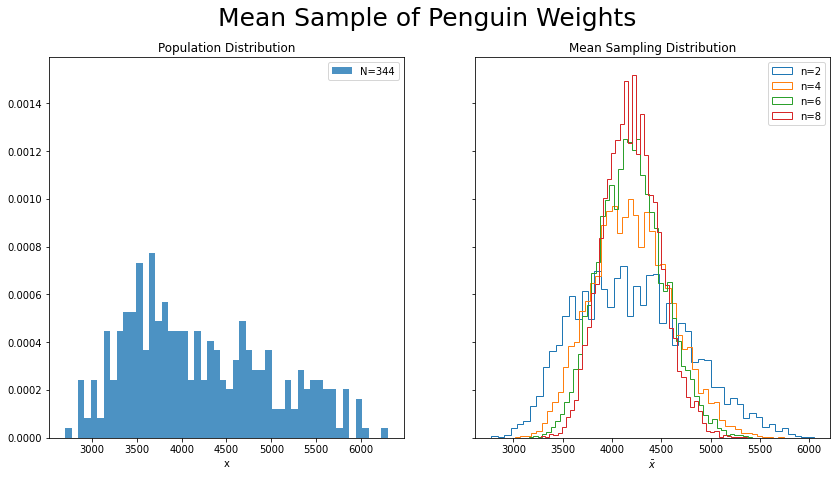

In [6]:
CLT_Demonstrator(penguins['body_mass_g'],
                [2, 4, 6, 8], 
                'Mean Sample of Penguin Weights')
